In [1]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import fiona
import numpy as np
import pandas as pd
import os
import folium
from geopy.geocoders import Nominatim
from geopy import distance
from shapely.geometry import Point, Polygon
from datetime import datetime

shp_file_name = "NSW_LOC_POLYGON_shp/NSW_LOC_POLYGON_shp.shp"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = (
    "https://data.gov.au/data/dataset/"
    "91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
    "5e295412-357c-49a2-98d5-6caf099c2339/download/"
    "nsw_locality_polygon_shp.zip"
)

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [4]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


In [5]:
os.listdir(".")

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'addresses.csv',
 'all_burbs.png',
 'basic_pandas.ipynb',
 'bushfire_data',
 'Bushfire_Impact_Water_Data.ipynb',
 'Humor-Sans.ttf',
 'Info for project',
 'Lake Conjola Data Set.ipynb',
 'lake_addresses_data',
 'lake_data',
 'LICENSE',
 'maps',
 'maps.ipynb',
 'nsw_locality_polygon_shp.zip',
 'NSW_LOC_POLYGON_shp',
 'penalty_data_set_0.csv',
 'README.md',
 'tricks.ipynb',
 'tricks.py']

In [6]:
folder = "lake_data"
all_dataframes = []
for file_name in os.listdir(folder):
    path = os.path.join(folder, file_name)
    print(path)
    df = pd.read_csv(path, parse_dates=[0])
    df.columns = [
        "dateTime",
        "estuaryName",
        "siteID",
        "loggerID",
        "sampleDepth",
        "conductivity",
        "temp",
        "density",
    ]
    df["source_file"] = file_name
    all_dataframes.append(df)

lake_data\Conjola_Lake_Bushfire_Water_Quality_Data.csv
lake_data\Meroo_Lake_Bushfire_Water_Quality_Data.csv
lake_data\Turmeil_Lake_Bushfire_Water_Quality.csv
lake_data\Tuross_Lake_Bushfire_Water_Quality_Data.csv


IMPACT OF THE 2020 BUSHFIRES 

FIRST ROWS:

In [7]:
all_dataframes[0]

,dateTime,estuaryName,siteID,loggerID,sampleDepth,conductivity,temp,density,source_file
0,2020-01-20 12:30:00,Lake Conjola,CON1,CON1-Surface,0.5,35444.2,24.95,7.23,Conjola_Lake_Bushfire_Water_Quality_Data.csv
1,2020-01-20 12:45:00,Lake Conjola,CON1,CON1-Surface,0.5,34664.3,25.01,7.64,Conjola_Lake_Bushfire_Water_Quality_Data.csv
2,2020-01-20 13:00:00,Lake Conjola,CON1,CON1-Surface,0.5,34318.8,25.03,7.66,Conjola_Lake_Bushfire_Water_Quality_Data.csv
3,2020-01-20 13:15:00,Lake Conjola,CON1,CON1-Surface,0.5,34164.1,25.06,7.66,Conjola_Lake_Bushfire_Water_Quality_Data.csv
4,2020-01-20 13:30:00,Lake Conjola,CON1,CON1-Surface,0.5,34044.5,25.04,7.67,Conjola_Lake_Bushfire_Water_Quality_Data.csv
...,...,...,...,...,...,...,...,...,...
2682,2020-02-17 11:00:00,Lake Conjola,CON1,CON1-Surface,0.5,529.2,24.76,4.08,Conjola_Lake_Bushfire_Water_Quality_Data.csv
2683,2020-02-17 11:15:00,Lake Conjola,CON1,CON1-Surface,0.5,528.3,24.75,3.86,Conjola_Lake_Bushfire_Water_Quality_Data.csv
2684,2020-02-17 11:30:00,Lake Conjola,CON1,CON1-Surface,0.5,527.9,24.74,4.03,Conjola_Lake_Bushfire_Water_Quality_Data.csv
2685,2020-02-17 11:45:00,Lake Conjola,CON1,CON1-Surface,0.5,526.9,24.76,4.14,Conjola_Lake_Bushfire_Water_Quality_Data.csv


In [8]:
all_lakes_df = pd.concat(all_dataframes)
all_lakes_df.sample(4)

,dateTime,estuaryName,siteID,loggerID,sampleDepth,conductivity,temp,density,source_file
1102,2020-02-02 04:30:00,Meroo Lake,MER1,MER1-Surface,0.5,NaN,28.74,3.73,Meroo_Lake_Bushfire_Water_Quality_Data.csv
2149,2020-02-13 02:15:00,Termeil Lake,TER1,TER1-Surface,0.5,NaN,22.92,3.18,Turmeil_Lake_Bushfire_Water_Quality.csv
756,2020-01-29 16:00:00,Tuross River,TUR1,TUR1-Surface,0.5,38775.3,27.71,4.91,Tuross_Lake_Bushfire_Water_Quality_Data.csv
1308,2020-03-02 03:30:00,Lake Conjola,CON1,CON1-Surface,0.5,15351.6,28.22,6.79,Conjola_Lake_Bushfire_Water_Quality_Data.csv


In [9]:
type(df.dateTime[0])

pandas._libs.tslibs.timestamps.Timestamp

Lake Conjola (2687, 9)
Meroo Lake (2581, 9)
Termeil Lake (2591, 9)
Tuross River (2643, 9)


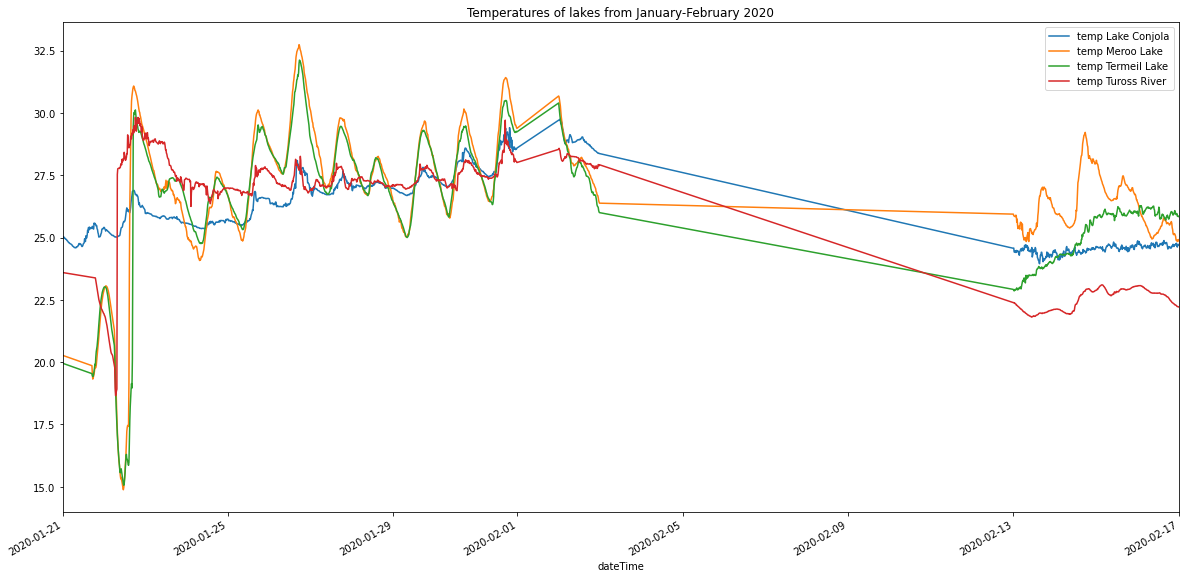

In [10]:
for name, df in all_lakes_df.groupby("estuaryName"):
    print(name, df.shape)
    df.set_index("dateTime").temp.plot(label=f"temp {name}")
plt.legend()
plt.xlim(["2020-01-21", "2020-02-17"])
plt.title("Temperatures of lakes from January-February 2020")
plt.show()

Lake Conjola (2687, 9)
Meroo Lake (2581, 9)
Termeil Lake (2591, 9)
Tuross River (2643, 9)


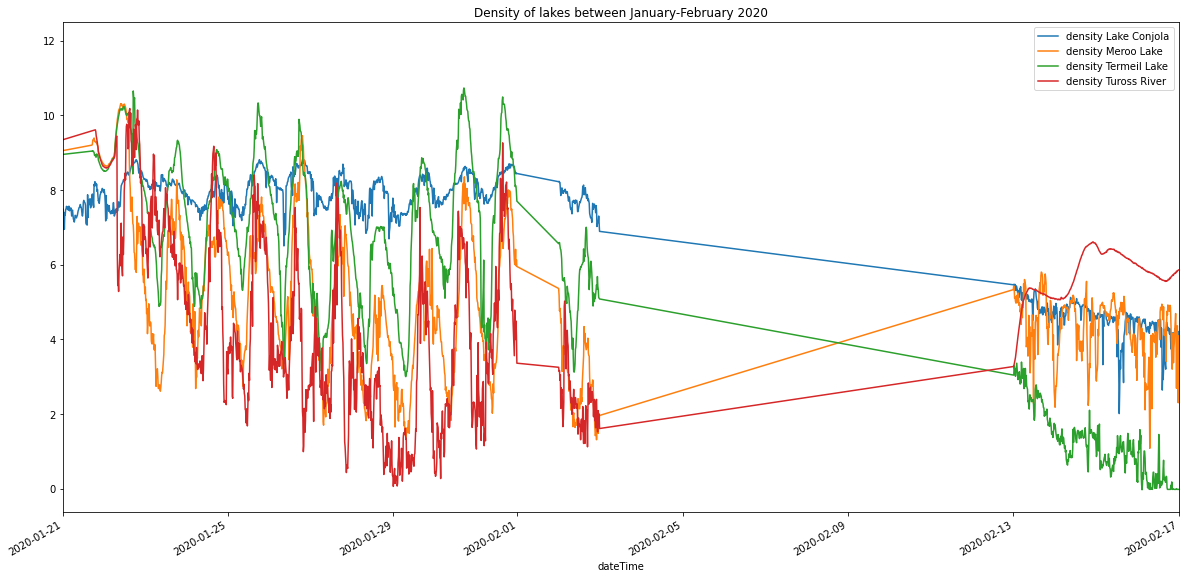

In [11]:
for name, df in all_lakes_df.groupby("estuaryName"):
    print(name, df.shape)
    df.set_index("dateTime").density.plot(label=f"density {name}")
plt.legend()
plt.xlim(["2020-01-21", "2020-02-17"])
plt.title("Density of lakes between January-February 2020")
plt.show()

Text(0.5, 1.0, 'Scatter plot of lakes temperature/density from January-February 2020')

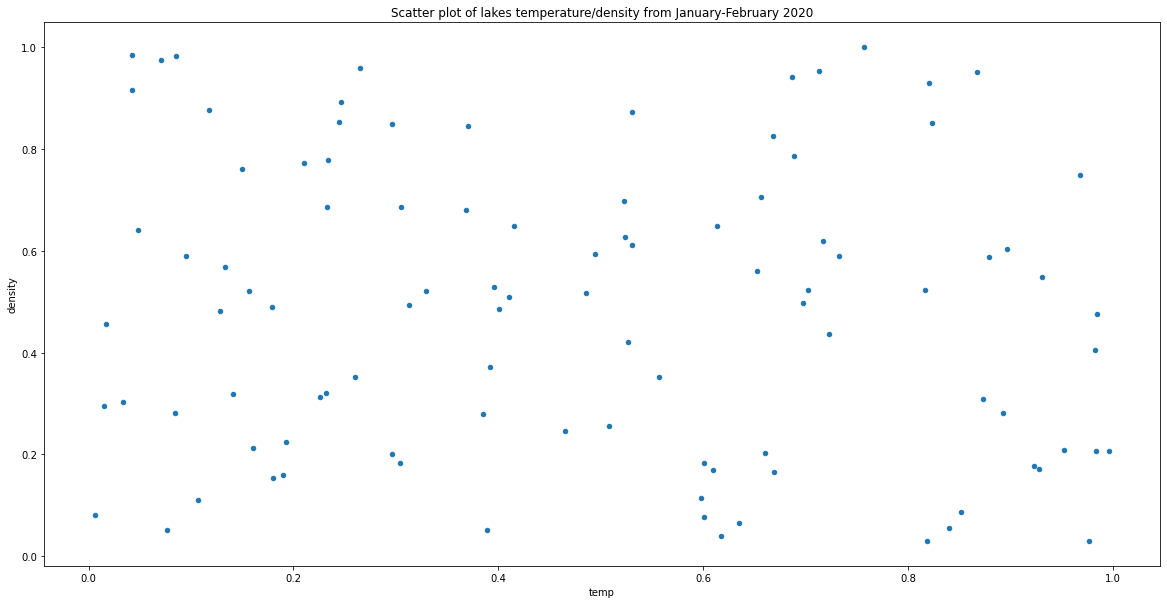

In [12]:
df = pd.DataFrame(np.random.rand(100, 2),
           columns =['temp', 'density'])
df.plot.scatter(x ='temp', y ='density');
plt.title("Scatter plot of lakes temperature/density from January-February 2020")

In [13]:
df1 = pd.read_csv("lake_addresses_data/lake_addresses.csv")
df = df1.loc[:, ("Name", "City", "State", "Zip", "Longitude", "Latitude", "Type")]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       4 non-null      object 
 1   City       4 non-null      object 
 2   State      4 non-null      object 
 3   Zip        4 non-null      int64  
 4   Longitude  4 non-null      float64
 5   Latitude   4 non-null      float64
 6   Type       4 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 352.0+ bytes


In [14]:
geometry = gpd.points_from_xy(df.Longitude, df.Latitude)
geo_df = gpd.GeoDataFrame(df[["Name", "City", "State", "Zip", "Longitude", "Latitude", "Type"]], geometry=geometry)

geo_df.head()

,Name,City,State,Zip,Longitude,Latitude,Type,geometry
0,Lake Termeil,Shoalhaven City Council,NSW,2539,-35.481667,150.334444,Lake,POINT (-35.482 150.334)
1,Lake Conjola,Shoalhaven City Council,NSW,2539,-35.269800,150.489122,Lake,POINT (-35.270 150.489)
2,Meroo Lake,Shoalhaven City Council,NSW,2539,-35.483963,150.385142,Lake,POINT (-35.484 150.385)
3,Tuross Lake,Eurobodalla Shire Council,NSW,2537,-36.054832,150.099219,Lake,POINT (-36.055 150.099)


In [15]:
geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")
location = geolocator.geocode('Lake Conjola')
geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")
location = geolocator.geocode('Lake Termeil')
geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")
location = geolocator.geocode('Meroo Lake')
geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")
location = geolocator.geocode('Tuross Lake')

In [16]:
m = folium.Map(location=(-35.2698003, 150.4891222), zoom_start=8)
m
df['full_address'] = df.Name + "," + df.City + "," + df.State
df['gcode'] = df.full_address.apply(geolocator.geocode)
df['lat'] = [g.latitude for g in df.gcode]
df['long'] = [g.longitude for g in df.gcode]
for index, row in df.iterrows():
    folium.Marker(location=(row['lat'],row['long'])).add_to(m)
    display(m)

In [17]:
#Close up of Lake Conjola
mapa = folium.Map(location=(-35.2698003, 150.4891222), zoom_start=12.4)
display(mapa)

In [18]:
#Close up of Lake Termeil and Meroo Lake
mapa = folium.Map(location=(-35.4816667, 150.4000000), zoom_start=13.4)
display(mapa)

In [19]:
#Close up of Tuross Lake
mapa = folium.Map(location=(-36.054832, 150.099219), zoom_start=11)
display(mapa)

In [20]:
location_1 = geolocator.geocode('Lake Conjola')
location_1_gps = (location_1.latitude, location_1.longitude)
location_2 = geolocator.geocode('Lake Termeil')
location_2_gps = (location_2.latitude, location_2.longitude)
# distance in kilometers
distance_calc_km = distance.distance(location_1_gps, location_2_gps).km
print(distance_calc_km)

27.387729943674273


In [21]:
location_1 = geolocator.geocode('Meroo Lake')
location_1_gps = (location_1.latitude, location_1.longitude)
location_2 = geolocator.geocode('Tuross Lake')
location_2_gps = (location_2.latitude, location_2.longitude)
# distance in kilometers
distance_calc_km = distance.distance(location_1_gps, location_2_gps).km
print(distance_calc_km)

68.41408199063747
